In [118]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

%matplotlib inline

In [119]:
#infile = open("calo_data_output.csv", "r")
#readin = csv.reader(infile)

In [120]:
caloData = pandas.read_csv("calo_data_output.csv")

In [121]:
caloData.head()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
0,1,15937273,15937,27,5,513.0
1,1,15937275,15937,27,7,574.0
2,1,15937277,15937,27,9,571.0
3,1,15937279,15937,27,11,547.0
4,1,159372711,15937,27,14,471.0


In [122]:
caloData.loc[caloData['Global Bin'] == 15937273].head()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
0,1,15937273,15937,27,5,513.0
20677,2,15937273,15937,27,5,508.0
41354,3,15937273,15937,27,5,642.0
62031,4,15937273,15937,27,5,624.0
82708,5,15937273,15937,27,5,655.0


In [123]:
caloData1 = caloData.loc[caloData['Calorimeter Number'] == 1]
caloData1.tail()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
20672,1,15928463145,15928,463,147,580.0
20673,1,15928463147,15928,463,149,518.0
20674,1,15928463149,15928,463,151,585.0
20675,1,15928463151,15928,463,154,439.0
20676,1,15928463154,15928,463,154,476.0


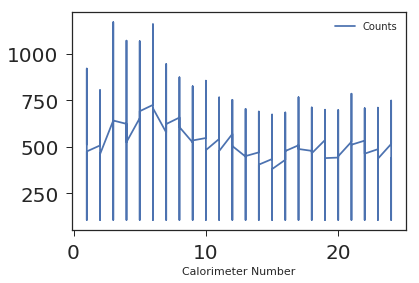

In [124]:
caloData.plot(y='Counts',x='Calorimeter Number')

In [125]:
data = []
for i in range(1,25):
    caloDatai = caloData.loc[caloData['Calorimeter Number'] == i]
    data.append(caloDatai['Counts'])

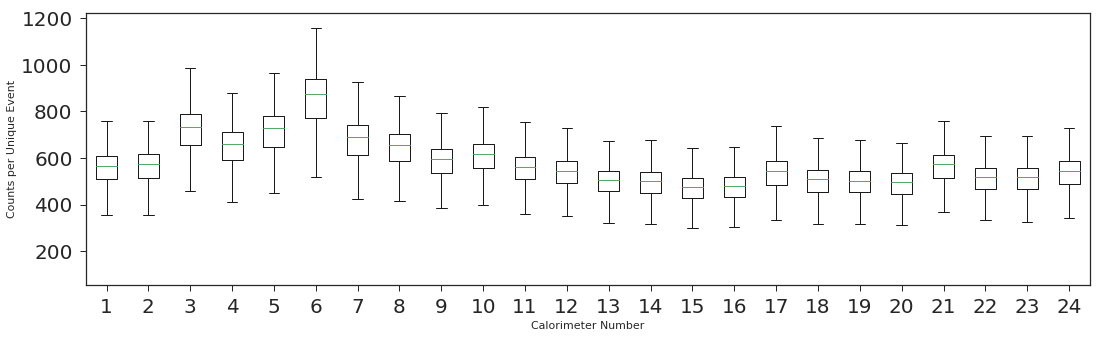

In [126]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.boxplot(data)
plt.xlabel('Calorimeter Number')
plt.ylabel('Counts per Unique Event')
plt.show()

Ok, this doesn't show the pattern that Kim was talking about earlier. Lets try to get the energy version and see from there

In [159]:
#caloDataEnergy = pandas.read_csv("./calo_data_output_energy2.csv")
caloDataEnergy = pandas.read_csv("./calo_data_output_energy_noConcatination.csv")
caloDataEnergy.head()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
0,1,1593700270003,0,0,0,2217.825800
1,1,1593700270003,15937,27,3,2135.008314
2,1,1593700270003,15937,27,3,2071.256980
3,1,1593700270003,15937,27,3,2592.216307
4,1,1593700270003,15937,27,3,1914.840913


       Calorimeter Number    Global Bin     Run Number  SubRun Number  \
count            549169.0  5.491690e+05  549169.000000  549169.000000   
mean                  1.0  1.595371e+12   15953.660968     233.303559   
std                   0.0  2.114776e+09      30.177944     143.945992   
min                   1.0  1.592101e+12       0.000000       0.000000   
25%                   1.0  1.593502e+12   15935.000000     100.000000   
50%                   1.0  1.595000e+12   15950.000000     230.000000   
75%                   1.0  1.597401e+12   15974.000000     359.000000   
max                   1.0  1.598905e+12   15989.000000     496.000000   

        Event Number         Counts  
count  549169.000000  549169.000000  
mean       80.250630    2091.177940  
std        45.869667     314.827376  
min         0.000000    1650.000538  
25%        41.000000    1834.760429  
50%        80.000000    2041.380788  
75%       119.000000    2299.034825  
max       205.000000    5592.461197  


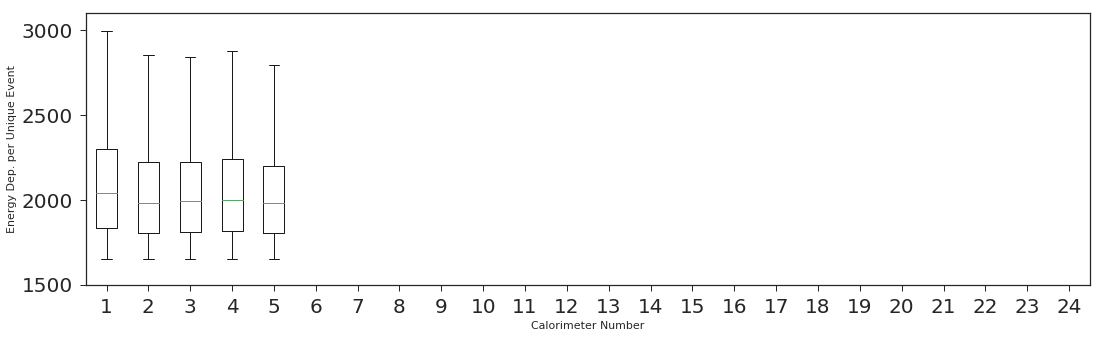

In [160]:
dataEnergy = []
for i in range(1,25):
    caloDatai = caloDataEnergy.loc[caloDataEnergy['Calorimeter Number'] == i]
    dataEnergy.append(caloDatai['Counts'])
    print(caloDatai.describe())
fig, ax = plt.subplots(figsize=(18, 5))
ax.boxplot(dataEnergy)
plt.xlabel('Calorimeter Number')
plt.ylabel('Energy Dep. per Unique Event')
plt.ylim(1500,3100)
plt.show()

This doesn't show the pattern either. Calo 2 is perfectly well behaved according to these two metrics. 

Now lets implement an energy cut (1000 < E < 3000 MeV) and see if that changes anything

In [129]:
caloDataEnergyCut = pandas.read_csv("calo_data_output_cutEnergy.csv")
caloDataEnergyCut.head()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
0,1,1593700270003,15937,27,3,22
1,1,1593700270005,15937,27,5,35
2,1,1593700270007,15937,27,7,29
3,1,1593700270009,15937,27,9,32
4,1,1593700270011,15937,27,11,19


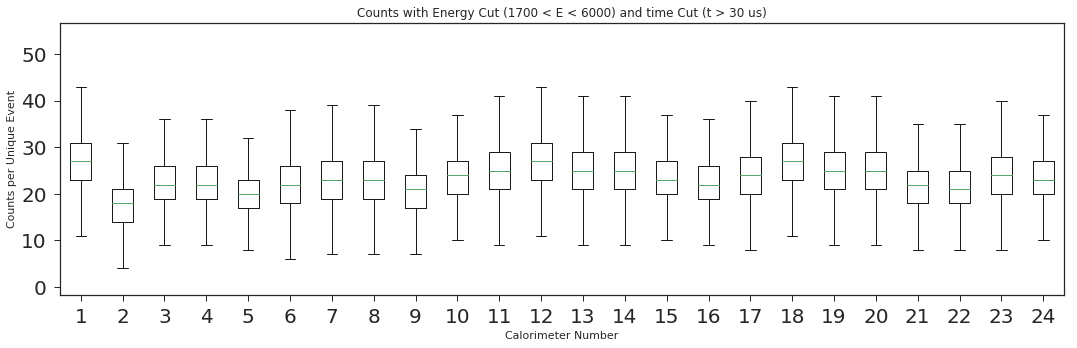

In [130]:
dataEnergyCut = []
for i in range(1,25):
    caloDatai = caloDataEnergyCut.loc[caloDataEnergyCut['Calorimeter Number'] == i]
    dataEnergyCut.append(caloDatai['Counts'])
fig, ax = plt.subplots(figsize=(18, 5))
ax.boxplot(dataEnergyCut)
plt.xlabel('Calorimeter Number')
plt.ylabel('Counts per Unique Event')
plt.title('Counts with Energy Cut (1700 < E < 6000) and time Cut (t > 30 us)')
plt.show()

Nope! If anything, it just makes everything clump closer together... Hmmmm

In [131]:
caloDataXInt = pandas.read_csv("calo_data_output_xIntercept.csv")
caloDataXInt.head()

,Par0,Par0Err,Par1,Par1Err,CaloNum
0,-0.000190,2.679656e-07,2883.521876,0.781788,1
1,-0.000285,4.841013e-07,2737.854376,1.078235,2
2,-0.000283,4.020058e-07,2764.254587,0.808987,3
3,-0.000265,3.648094e-07,2767.763074,0.725848,4
4,-0.000292,5.378535e-07,2811.783892,1.473246,5


In [132]:
caloDataEnergyCut.describe()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
count,454904.000000,4.549040e+05,454904.000000,454904.00000,454904.000000,454904.000000
mean,12.499967,1.595299e+12,15952.970732,233.66585,80.469912,23.465758
std,6.922208,2.114230e+09,21.142742,143.84307,45.929507,6.148693
min,1.000000,1.592101e+12,15921.000000,0.00000,1.000000,1.000000
25%,6.000000,1.593500e+12,15935.000000,100.00000,41.000000,19.000000
50%,12.000000,1.594901e+12,15949.000000,230.00000,80.000000,23.000000
75%,19.000000,1.597303e+12,15973.000000,360.00000,119.000000,27.000000
max,24.000000,1.598905e+12,15989.000000,496.00000,284.000000,54.000000


[(26.974306215046955, 2883.521875536584, '1', 6.311504685147005, 0.7817879331583022), (17.78363406141184, 2737.854376048288, '2', 4.804529705081141, 1.0782347700086456), (22.55761316872428, 2764.254587229305, '3', 5.589350333049099, 0.8089871531672591), (22.585610296444774, 2767.763073739194, '4', 5.597932131304724, 0.7258480761573709), (20.08715838345468, 2811.783892252652, '5', 5.194156837596443, 1.473245994408933), (22.20507544581619, 2765.434170455375, '6', 5.525810238017972, 0.9287755124974588), (23.394586894586894, 2802.3563967754394, '7', 5.6800586019228785, 0.9194005500978016), (22.80431571172312, 2755.4527784231464, '8', 5.596895253476203, 0.6850420011128283), (20.823687681350567, 2740.5091002623817, '9', 5.3154712571521445, 0.7799988614429975), (23.633797615279097, 2803.132660352266, '10', 5.749300867746941, 0.9104434861601703), (25.448559670781894, 2849.8828324797432, '11', 6.031470719282435, 0.8082504820806571), (27.166191832858498, 2921.109205437848, '12', 6.31469730751229

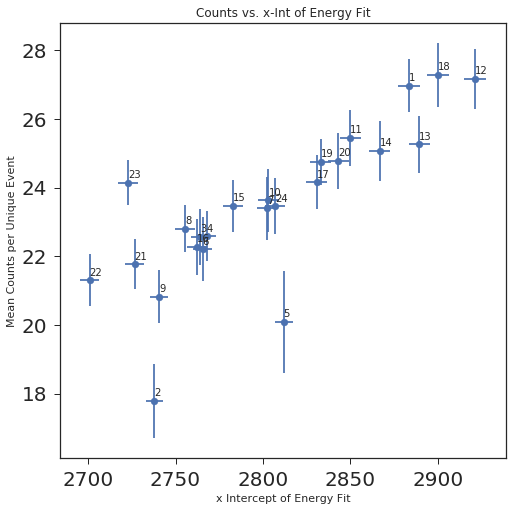

In [133]:
dataEnergyScatter = []
label = []
for i in range(1,25):
    caloDatai = caloDataEnergyCut.loc[caloDataEnergyCut['Calorimeter Number'] == i]
    intDatai = caloDataXInt.loc[caloDataXInt['CaloNum'] == i]
    dataEnergyScatter.append(((caloDatai['Counts']).mean(),intDatai['Par1'].mean(),str(i),caloDatai['Counts'].std(),intDatai['Par1Err'].mean()))
    label.append(str(i))
    
print(dataEnergyScatter)

fig, ax = plt.subplots(figsize=(8, 8))
y,x,z,yerr,xerr = zip(*dataEnergyScatter)
plt.scatter(x, y)
plt.xlabel('x Intercept of Energy Fit')
plt.ylabel('Mean Counts per Unique Event')
plt.title('Counts vs. x-Int of Energy Fit')
plt.errorbar(x, y, xerr, yerr, ls='none')
for j,i,label,yerr,xerr in dataEnergyScatter:
    print(i,j)
    ax.annotate(label, xy=(i,j), xytext=(0,5), textcoords='offset points')
plt.show()

-3.0245002253428237 2549.9999962747097 27.220500225342825 3050.0000037252903
0.038461538461538464
-1.9230769230769231 51.92307692307692


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


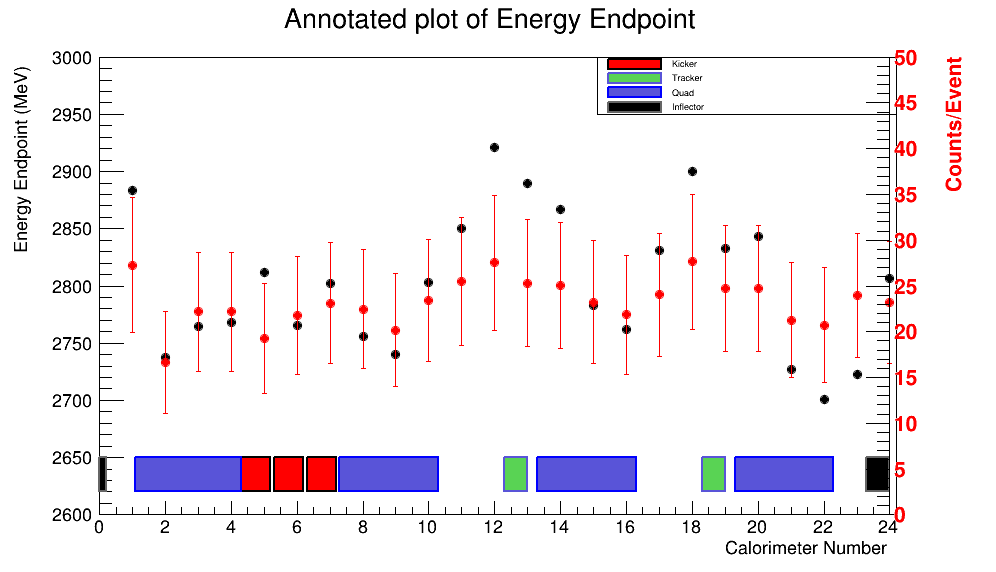

In [134]:
c = r.TCanvas("c","c",1000,600)
counts,energy,label,countsErr,energyErr = zip(*dataEnergyScatter)

pad1 = r.TPad("pad1","",0,0,1,1)
pad2 = r.TPad("pad2","",0,0,1,1)
pad2.SetFillStyle(4000) #will be transparent
pad1.Draw()
pad1.cd()

graph = r.TGraphErrors()
for i in range(len(counts)):
    graph.SetPoint(i,r.Double(label[i]),r.Double(energy[i]))
    graph.SetPointError(i,0,energyErr[i])
    
graph.SetMarkerSize(1)
graph.SetMarkerStyle(20)
graph.Draw("a p0 e0")
graph.GetYaxis().SetRangeUser(2600,3000)
graph.GetXaxis().SetRangeUser(0,24)

graph.GetYaxis().SetTitle("Energy Endpoint (MeV)")
graph.GetXaxis().SetTitle("Calorimeter Number")
graph.SetTitle("Annotated plot of Energy Endpoint")

minpos = 2620
maxpos = 2650
maxpos2 = 2650

#kicker1 = r.TBox(3.5,2620,4.25,2650)
kicker1 = r.TBox(4.3,minpos,5.2,maxpos)
kicker1.SetFillColor(2)
kicker1.SetLineColor(1)
kicker1.SetLineWidth(2)
kicker1.Draw("FL SAME")

#kicker2 = r.TBox(4.5,2620,5.25,2650)
kicker2 = r.TBox(5.3,minpos,6.2,maxpos)
kicker2.SetFillColor(2)
kicker2.SetLineColor(1)
kicker2.SetLineWidth(2)
kicker2.Draw("FL SAME")

#kicker3 = r.TBox(5.5,2620,6.3,2650)
kicker3 = r.TBox(6.3,minpos,7.2,maxpos)
kicker3.SetFillColor(2)
kicker3.SetLineColor(1)
kicker3.SetLineWidth(2)
kicker3.Draw("FL SAME")

#tracker1 = r.TBox(11.6,2620,12.7,2630)
tracker1 = r.TBox(12.3,minpos,13,maxpos2)
tracker1.SetFillColor(8)
tracker1.SetLineColor(9)
tracker1.SetLineWidth(2)
tracker1.Draw("FL SAME")

#tracker2 = r.TBox(17.9,2620,18.8,2630)
tracker2 = r.TBox(18.3,minpos,19,maxpos2)
tracker2.SetFillColor(8)
tracker2.SetLineColor(9)
tracker2.SetLineWidth(2)
tracker2.Draw("FL SAME")

tracker3 = r.TBox(0.3,minpos,1,maxpos2)
tracker3.SetFillColor(8)
tracker3.SetLineColor(9)
tracker3.SetLineWidth(2)
#tracker3.Draw("FL SAME") #doesn't really exist :(

'''
col1 = r.TBox(15.9,2620,15.9,2650)
col1.SetFillColor(22)
col1.SetLineColor(23)
col1.SetLineWidth(2)
col1.Draw("FL SAME")

col2 = r.TBox(19.7,2620,19.7,2650)
col2.SetFillColor(22)
col2.SetLineColor(23)
col2.SetLineWidth(2)
col2.Draw("FL SAME")
'''

quad1 = r.TBox(1.1,minpos,4.3,maxpos2)
quad1.SetFillColor(9)
quad1.SetLineColor(4)
quad1.SetLineWidth(2)
quad1.Draw("FL SAME")

quad2 = r.TBox(7.3,minpos,10.3,maxpos2)
quad2.SetFillColor(9)
quad2.SetLineColor(4)
quad2.SetLineWidth(2)
quad2.Draw("FL SAME")

quad3 = r.TBox(13.3,minpos,16.3,maxpos2)
quad3.SetFillColor(9)
quad3.SetLineColor(4)
quad3.SetLineWidth(2)
quad3.Draw("FL SAME")

quad4 = r.TBox(19.3,minpos,22.3,maxpos2)
quad4.SetFillColor(9)
quad4.SetLineColor(4)
quad4.SetLineWidth(2)
quad4.Draw("FL SAME")

inf1 = r.TBox(23.3,minpos,24,maxpos2)
inf1.SetFillColor(1)
inf1.SetLineColor(13)
inf1.SetLineWidth(2)
inf1.Draw("FL SAME")

inf2 = r.TBox(0,minpos,0.2,maxpos2)
inf2.SetFillColor(1)
inf2.SetLineColor(13)
inf2.SetLineWidth(2)
inf2.Draw("FL SAME")

leg = r.TLegend(.6,.8,.9,.9)
#leg.AddEntry(graph,"Energy Endpoint","pl")
leg.AddEntry(kicker1,"Kicker","f")
leg.AddEntry(tracker2,"Tracker","f")
#leg.AddEntry(col1,"Collimator","f")
leg.AddEntry(quad1,"Quad","f")
leg.AddEntry(inf1,"Inflector","f")
leg.Draw("SAME")
pad1.Update()


x1 = r.Double(0.0)
y1 = r.Double(0.0)
x2 = r.Double(0.0)
y2 = r.Double(0.0)
pad1.GetRange(x1,y1,x2,y2)
print(x1,y1,x2,y2)

padding = 100/2600
print(padding)

pad2.Range(x1,0-padding*50,x2,50+padding*50)
print(0-padding*50, 50+padding*50)

pad2.Draw()
pad2.cd()
graph2 = r.TGraphErrors()
for i in range(len(counts)):
    graph2.SetPoint(i,r.Double(label[i]),r.Double(counts[i]))
    graph2.SetPointError(i,0,countsErr[i])

graph2.SetMarkerSize(1)
graph2.SetMarkerStyle(20)
graph2.SetMarkerColor(2)
graph2.SetLineColor(2)
graph2.GetYaxis().SetRangeUser(0,50)
graph2.GetXaxis().SetRangeUser(0,24)
graph2.Draw("p")
pad2.Update()

pad1.cd()

low = 0
high = 50
axis = r.TGaxis(24,2600,24,3000,low,high,510,"+L");
axis.SetLabelColor(2)
axis.SetTitleColor(2)
axis.SetTitle("Counts/Event")
axis.Draw()


c.Draw()

In [135]:
caloDataMean = pandas.read_csv("calo_data_output_xMean_500_4500.csv")
caloDataMean.head()

,Mean,MeanErr,CaloNum
0,1446.210241,0.059330,1
1,1348.201716,0.060870,2
2,1372.689393,0.056530,3
3,1389.522836,0.058069,4
4,1343.267534,0.056341,5


In [136]:
caloDataMean.describe()

,Mean,MeanErr,CaloNum
count,24.000000,24.000000,24.000000
mean,1402.989085,0.058638,12.500000
std,31.060226,0.001247,7.071068
min,1343.267534,0.056341,1.000000
25%,1382.566737,0.057771,6.750000
50%,1401.101467,0.058590,12.500000
75%,1424.643962,0.059319,18.250000
max,1459.970298,0.061070,24.000000


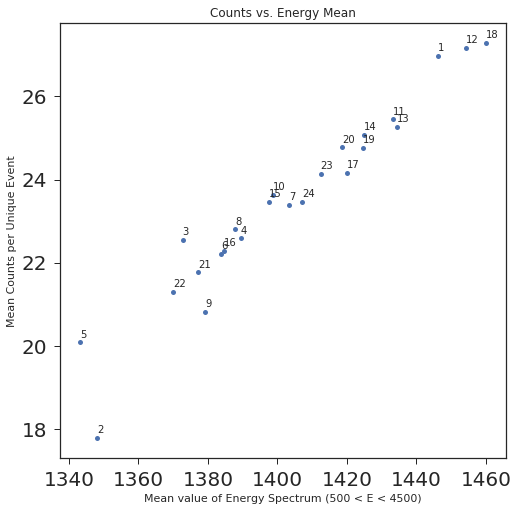

In [137]:
dataEnergyScatter = []
label = []

for i in range(1,25):
    caloDatai = caloDataEnergyCut.loc[caloDataEnergyCut['Calorimeter Number'] == i]
    intDatai = caloDataMean.loc[caloDataXInt['CaloNum'] == i]
    dataEnergyScatter.append(((caloDatai['Counts']).mean(),intDatai['Mean'].mean(),str(i),caloDatai['Counts'].std(),intDatai['MeanErr'].mean()))
    label.append(str(i))
    
fig, ax = plt.subplots(figsize=(8, 8))
Counts,Mean,z,CountsErr,MeanErr = zip(*dataEnergyScatter)
plt.xlabel('Mean value of Energy Spectrum (500 < E < 4500)')
plt.ylabel('Mean Counts per Unique Event')
plt.title('Counts vs. Energy Mean')
plt.errorbar(x = Mean, y = Counts, yerr = 0, xerr = MeanErr, ls='none',markersize=5,fmt='o')
for j,i,label,yerr,xerr in dataEnergyScatter:
    ax.annotate(label, xy=(i,j), xytext=(0,5), textcoords='offset points')

plt.show()

0.0 1300.0 24.196 1480.0
-3.0245002253428237 1277.4999983236194 27.220500225342825 1502.5000016763806
180.0 225.00000335276127
0.2500000186264515
-12.500000931322575 62.500000931322575
1331.5292743851583 1471.7122876664805


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


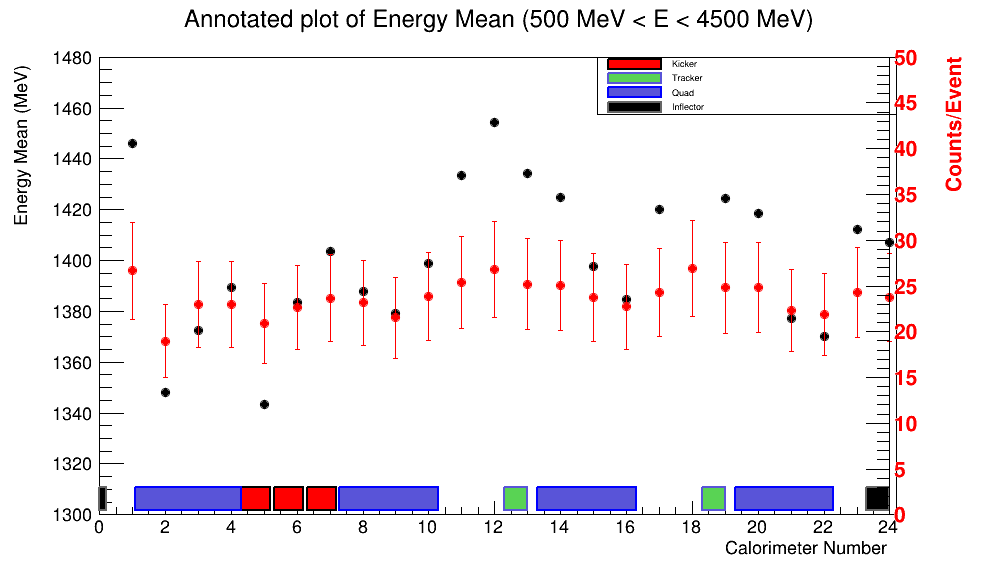

In [138]:
c = r.TCanvas("c","c",1000,600)
counts,energy,label,countsErr,energyErr = zip(*dataEnergyScatter)

pad1 = r.TPad("pad1","",0,0,1,1)
pad2 = r.TPad("pad2","",0,0,1,1)
pad2.SetFillStyle(4000) #will be transparent
pad1.Draw()
pad1.cd()

graph = r.TGraphErrors()
for i in range(len(counts)):
    graph.SetPoint(i,r.Double(label[i]),r.Double(energy[i]))
    graph.SetPointError(i,0,energyErr[i])
    
yMin = 1300
yMax = 1480

graph.SetMarkerSize(1)
graph.SetMarkerStyle(20)
graph.Draw("a p0 e0")
graph.GetYaxis().SetRangeUser(yMin,yMax)
graph.GetXaxis().SetRangeUser(0,24)

graph.GetYaxis().SetTitle("Energy Mean (MeV)")
graph.GetXaxis().SetTitle("Calorimeter Number")
graph.SetTitle("Annotated plot of Energy Mean (500 MeV < E < 4500 MeV)")

minpos = yMin + (yMax - yMin)*0.01
maxpos = minpos+ (yMax - yMin)*0.05
maxpos2 = maxpos

#kicker1 = r.TBox(3.5,2620,4.25,2650)
kicker1 = r.TBox(4.3,minpos,5.2,maxpos)
kicker1.SetFillColor(2)
kicker1.SetLineColor(1)
kicker1.SetLineWidth(2)
kicker1.Draw("FL SAME")

#kicker2 = r.TBox(4.5,2620,5.25,2650)
kicker2 = r.TBox(5.3,minpos,6.2,maxpos)
kicker2.SetFillColor(2)
kicker2.SetLineColor(1)
kicker2.SetLineWidth(2)
kicker2.Draw("FL SAME")

#kicker3 = r.TBox(5.5,2620,6.3,2650)
kicker3 = r.TBox(6.3,minpos,7.2,maxpos)
kicker3.SetFillColor(2)
kicker3.SetLineColor(1)
kicker3.SetLineWidth(2)
kicker3.Draw("FL SAME")

#tracker1 = r.TBox(11.6,2620,12.7,2630)
tracker1 = r.TBox(12.3,minpos,13,maxpos2)
tracker1.SetFillColor(8)
tracker1.SetLineColor(9)
tracker1.SetLineWidth(2)
tracker1.Draw("FL SAME")

#tracker2 = r.TBox(17.9,2620,18.8,2630)
tracker2 = r.TBox(18.3,minpos,19,maxpos2)
tracker2.SetFillColor(8)
tracker2.SetLineColor(9)
tracker2.SetLineWidth(2)
tracker2.Draw("FL SAME")

tracker3 = r.TBox(0.3,minpos,1,maxpos2)
tracker3.SetFillColor(8)
tracker3.SetLineColor(9)
tracker3.SetLineWidth(2)
#tracker3.Draw("FL SAME") #doesn't really exist :(

'''
col1 = r.TBox(15.9,2620,15.9,2650)
col1.SetFillColor(22)
col1.SetLineColor(23)
col1.SetLineWidth(2)
col1.Draw("FL SAME")

col2 = r.TBox(19.7,2620,19.7,2650)
col2.SetFillColor(22)
col2.SetLineColor(23)
col2.SetLineWidth(2)
col2.Draw("FL SAME")
'''

quad1 = r.TBox(1.1,minpos,4.3,maxpos2)
quad1.SetFillColor(9)
quad1.SetLineColor(4)
quad1.SetLineWidth(2)
quad1.Draw("FL SAME")

quad2 = r.TBox(7.3,minpos,10.3,maxpos2)
quad2.SetFillColor(9)
quad2.SetLineColor(4)
quad2.SetLineWidth(2)
quad2.Draw("FL SAME")

quad3 = r.TBox(13.3,minpos,16.3,maxpos2)
quad3.SetFillColor(9)
quad3.SetLineColor(4)
quad3.SetLineWidth(2)
quad3.Draw("FL SAME")

quad4 = r.TBox(19.3,minpos,22.3,maxpos2)
quad4.SetFillColor(9)
quad4.SetLineColor(4)
quad4.SetLineWidth(2)
quad4.Draw("FL SAME")

inf1 = r.TBox(23.3,minpos,24,maxpos2)
inf1.SetFillColor(1)
inf1.SetLineColor(13)
inf1.SetLineWidth(2)
inf1.Draw("FL SAME")

inf2 = r.TBox(0,minpos,0.2,maxpos2)
inf2.SetFillColor(1)
inf2.SetLineColor(13)
inf2.SetLineWidth(2)
inf2.Draw("FL SAME")

leg = r.TLegend(.6,.8,.9,.9)
#leg.AddEntry(graph,"Energy Endpoint","pl")
leg.AddEntry(kicker1,"Kicker","f")
leg.AddEntry(tracker2,"Tracker","f")
#leg.AddEntry(col1,"Collimator","f")
leg.AddEntry(quad1,"Quad","f")
leg.AddEntry(inf1,"Inflector","f")
leg.Draw("SAME")
pad1.Update()


x1 = r.Double(0.0)
y1 = r.Double(0.0)
x2 = r.Double(0.0)
y2 = r.Double(0.0)
pad1.GetRangeAxis(x1,y1,x2,y2)
print(x1,y1,x2,y2)
yRangeRestricted = r.TMath.Abs(y1-y2)

pad1.GetRange(x1,y1,x2,y2)
print(x1,y1,x2,y2)

yRangeFull = r.TMath.Abs(y1-y2)

print(yRangeRestricted,yRangeFull)

padding = (yRangeFull-yRangeRestricted)/yRangeRestricted
print(padding)

pad2.Range(x1,0-padding*50,x2,50+padding*50)
print(0-padding*50, 50+padding*50)

pad2.Draw()
pad2.cd()
graph2 = r.TGraphErrors()
for i in range(len(counts)):
    graph2.SetPoint(i,r.Double(label[i]),r.Double(counts[i]))
    graph2.SetPointError(i,0,countsErr[i])

graph2.SetMarkerSize(1)
graph2.SetMarkerStyle(20)
graph2.SetMarkerColor(2)
graph2.SetLineColor(2)
graph2.GetYaxis().SetRangeUser(0,50)
graph2.GetXaxis().SetRangeUser(0,24)
graph2.Draw("p")
pad2.Update()

pad1.cd()

print(graph.GetYaxis().GetXmin(),graph.GetYaxis().GetXmax())

low = 0
high = 50
axis = r.TGaxis(24,yMin,24,yMax,low,high,510,"+L");
axis.SetLabelColor(2)
axis.SetTitleColor(2)
axis.SetTitle("Counts/Event")
axis.Draw()

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3


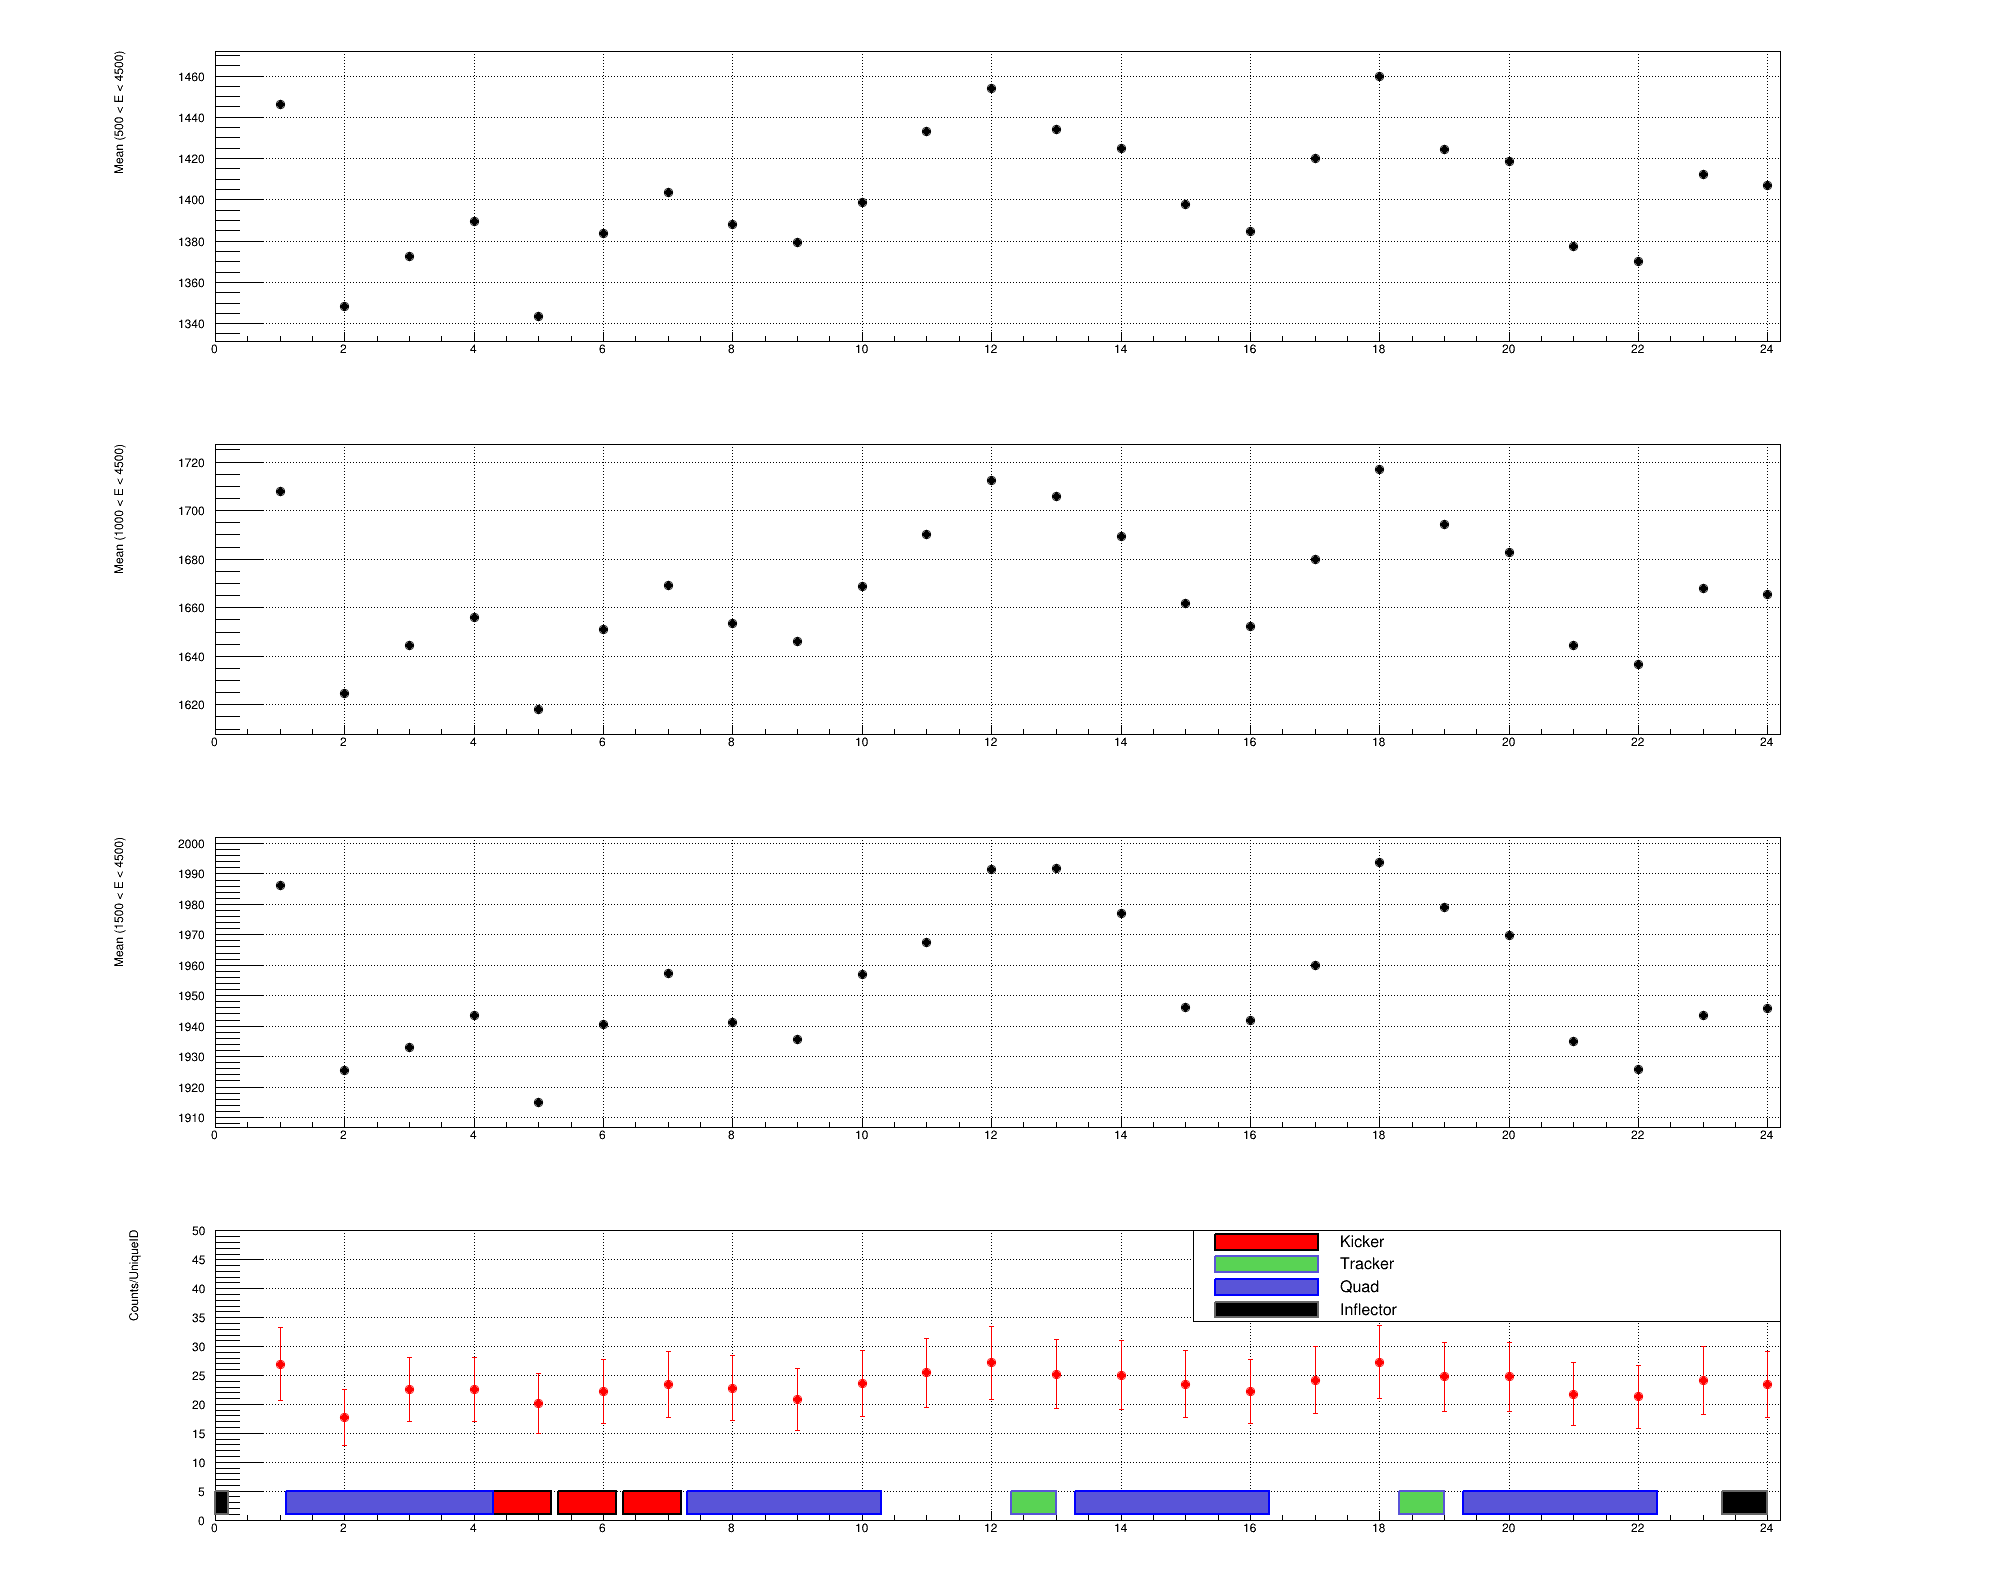

In [139]:
c3 = r.TCanvas("c3","c3",2000,1600)
c3.Divide(1,4)
c3.cd(1)

caloDataMean = pandas.read_csv("calo_data_output_xMean_500_4500.csv")
dataEnergyScatter500 = []
label = []

for i in range(1,25):
    caloDatai = caloDataEnergyCut.loc[caloDataEnergyCut['Calorimeter Number'] == i]
    intDatai = caloDataMean.loc[caloDataXInt['CaloNum'] == i]
    dataEnergyScatter500.append(((caloDatai['Counts']).mean(),intDatai['Mean'].mean(),str(i),caloDatai['Counts'].std(),intDatai['MeanErr'].mean()))
    label.append(str(i))

counts,energy,label,countsErr,energyErr = zip(*dataEnergyScatter500)
graph500 = r.TGraphErrors()
for i in range(len(counts)):
    graph500.SetPoint(i,r.Double(label[i]),r.Double(energy[i]))
    graph500.SetPointError(i,0,energyErr[i])
graph500.SetMarkerSize(1)
graph500.SetMarkerStyle(20)
graph500.GetXaxis().SetRangeUser(0,24)
graph500.GetYaxis().SetTitle("Mean (500 < E < 4500)")
graph500.Draw("a p0 e0")
c3.Draw()

caloDataMean = pandas.read_csv("calo_data_output_xMean_1000_4500.csv")
dataEnergyScatter1000 = []
label = []

for i in range(1,25):
    caloDatai = caloDataEnergyCut.loc[caloDataEnergyCut['Calorimeter Number'] == i]
    intDatai = caloDataMean.loc[caloDataXInt['CaloNum'] == i]
    dataEnergyScatter1000.append(((caloDatai['Counts']).mean(),intDatai['Mean'].mean(),str(i),caloDatai['Counts'].std(),intDatai['MeanErr'].mean()))
    label.append(str(i))

c3.cd(2)

counts,energy,label,countsErr,energyErr = zip(*dataEnergyScatter1000)
graph1000 = r.TGraphErrors()
for i in range(len(counts)):
    graph1000.SetPoint(i,r.Double(label[i]),r.Double(energy[i]))
    graph1000.SetPointError(i,0,energyErr[i])
graph1000.SetMarkerSize(1)
graph1000.SetMarkerStyle(20)
graph1000.GetXaxis().SetRangeUser(0,24)
graph1000.GetYaxis().SetTitle("Mean (1000 < E < 4500)")
graph1000.Draw("a p0 e0")
c3.Draw()

caloDataMean = pandas.read_csv("calo_data_output_xMean_1500_4500.csv")
dataEnergyScatter1500 = []
label = []

for i in range(1,25):
    caloDatai = caloDataEnergyCut.loc[caloDataEnergyCut['Calorimeter Number'] == i]
    intDatai = caloDataMean.loc[caloDataXInt['CaloNum'] == i]
    dataEnergyScatter1500.append(((caloDatai['Counts']).mean(),intDatai['Mean'].mean(),str(i),caloDatai['Counts'].std(),intDatai['MeanErr'].mean()))
    label.append(str(i))

c3.cd(3)

counts,energy,label,countsErr,energyErr = zip(*dataEnergyScatter1500)
graph1500 = r.TGraphErrors()
for i in range(len(counts)):
    graph1500.SetPoint(i,r.Double(label[i]),r.Double(energy[i]))
    graph1500.SetPointError(i,0,energyErr[i])
graph1500.SetMarkerSize(1)
graph1500.SetMarkerStyle(20)
graph1500.GetXaxis().SetRangeUser(0,24)
graph1500.GetYaxis().SetTitle("Mean (1500 < E < 4500)")
graph1500.Draw("a p0 e0")
c3.Draw()

c3.cd(4)
graph2.Draw("a p0 e0")
graph2.GetYaxis().SetTitle("Counts/UniqueID")

minpos = 1
maxpos = 5
maxpos2 = maxpos

#kicker1 = r.TBox(3.5,2620,4.25,2650)
kicker1 = r.TBox(4.3,minpos,5.2,maxpos)
kicker1.SetFillColor(2)
kicker1.SetLineColor(1)
kicker1.SetLineWidth(2)
kicker1.Draw("FL SAME")

#kicker2 = r.TBox(4.5,2620,5.25,2650)
kicker2 = r.TBox(5.3,minpos,6.2,maxpos)
kicker2.SetFillColor(2)
kicker2.SetLineColor(1)
kicker2.SetLineWidth(2)
kicker2.Draw("FL SAME")

#kicker3 = r.TBox(5.5,2620,6.3,2650)
kicker3 = r.TBox(6.3,minpos,7.2,maxpos)
kicker3.SetFillColor(2)
kicker3.SetLineColor(1)
kicker3.SetLineWidth(2)
kicker3.Draw("FL SAME")

#tracker1 = r.TBox(11.6,2620,12.7,2630)
tracker1 = r.TBox(12.3,minpos,13,maxpos2)
tracker1.SetFillColor(8)
tracker1.SetLineColor(9)
tracker1.SetLineWidth(2)
tracker1.Draw("FL SAME")

#tracker2 = r.TBox(17.9,2620,18.8,2630)
tracker2 = r.TBox(18.3,minpos,19,maxpos2)
tracker2.SetFillColor(8)
tracker2.SetLineColor(9)
tracker2.SetLineWidth(2)
tracker2.Draw("FL SAME")

tracker3 = r.TBox(0.3,minpos,1,maxpos2)
tracker3.SetFillColor(8)
tracker3.SetLineColor(9)
tracker3.SetLineWidth(2)
#tracker3.Draw("FL SAME") #doesn't really exist :(

'''
col1 = r.TBox(15.9,2620,15.9,2650)
col1.SetFillColor(22)
col1.SetLineColor(23)
col1.SetLineWidth(2)
col1.Draw("FL SAME")

col2 = r.TBox(19.7,2620,19.7,2650)
col2.SetFillColor(22)
col2.SetLineColor(23)
col2.SetLineWidth(2)
col2.Draw("FL SAME")
'''

quad1 = r.TBox(1.1,minpos,4.3,maxpos2)
quad1.SetFillColor(9)
quad1.SetLineColor(4)
quad1.SetLineWidth(2)
quad1.Draw("FL SAME")

quad2 = r.TBox(7.3,minpos,10.3,maxpos2)
quad2.SetFillColor(9)
quad2.SetLineColor(4)
quad2.SetLineWidth(2)
quad2.Draw("FL SAME")

quad3 = r.TBox(13.3,minpos,16.3,maxpos2)
quad3.SetFillColor(9)
quad3.SetLineColor(4)
quad3.SetLineWidth(2)
quad3.Draw("FL SAME")

quad4 = r.TBox(19.3,minpos,22.3,maxpos2)
quad4.SetFillColor(9)
quad4.SetLineColor(4)
quad4.SetLineWidth(2)
quad4.Draw("FL SAME")

inf1 = r.TBox(23.3,minpos,24,maxpos2)
inf1.SetFillColor(1)
inf1.SetLineColor(13)
inf1.SetLineWidth(2)
inf1.Draw("FL SAME")

inf2 = r.TBox(0,minpos,0.2,maxpos2)
inf2.SetFillColor(1)
inf2.SetLineColor(13)
inf2.SetLineWidth(2)
inf2.Draw("FL SAME")

leg = r.TLegend(.6,.65,.9,.9)
leg.AddEntry(kicker1,"Kicker","f")
leg.AddEntry(tracker2,"Tracker","f")
leg.AddEntry(quad1,"Quad","f")
leg.AddEntry(inf1,"Inflector","f")
leg.Draw("SAME")

pad500 = c3.cd(1)
pad500.SetGridx()
pad500.SetGridy()
pad1000 = c3.cd(2)
pad1000.SetGridx()
pad1000.SetGridy()
pad1500 = c3.cd(3)
pad1500.SetGridx()
pad1500.SetGridy()
pad4 = c3.cd(4)
pad4.SetGridx()
pad4.SetGridy()

c3.Draw()